In [1]:
import requests
import csv
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/cmusam/fortune500/master/csv/fortune500-{year}.csv"
years = range(1955, 2020)
urls = [url.format(year=year) for year in years]

In [3]:
raw_data = {}
for year, url in zip(years, urls):
    print(f"Downloading {year} data...")
    r = requests.get(url)
    raw_data[year] = r.text

In [14]:
raw_data[2020] = open("fortune500_2020.csv").read()
raw_data[2021] = open("fortune500_2021.csv").read()

In [15]:
data = {}
for year, raw_string in raw_data.items():
    year_data = list(csv.reader(raw_string.splitlines()))
    year_data.pop(0)

    for row in year_data:
        if row[3] in ("N.A.", ""):
            row[3] = "0"
    
    data[year] = year_data

In [16]:
from collections import Counter
counted = Counter([row[3] for year in data.values() for row in year])
counted.most_common(5)

[('0', 376), ('4.0', 77), ('3.0', 72), ('5.7', 67), ('6.0', 67)]

In [17]:
names = np.array([row[1] for year in data.values() for row in year]).reshape((-1, 500))
revenues = np.array([row[2] for year in data.values() for row in year], dtype=float).reshape((-1, 500))
profits = np.array([row[3] for year in data.values() for row in year], dtype=float).reshape((-1, 500))

In [18]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [25]:
average_profits = profits.mean(axis=1)
average_revenues = revenues.mean(axis=1)
years = range(1955, 2022)

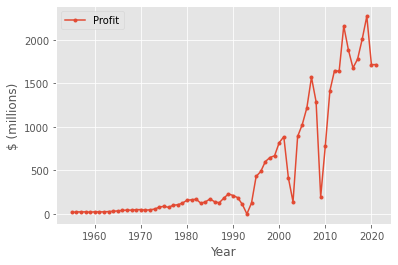

In [26]:
plt.plot(years, average_profits, marker=".", label="Profit")
plt.ylabel("$ (millions)")
plt.xlabel("Year")
plt.legend()
plt.show()

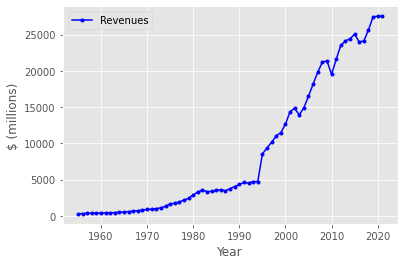

In [27]:

plt.plot(years, average_revenues, marker=".", label="Revenues", c="b")
plt.ylabel("$ (millions)")
plt.xlabel("Year")
plt.legend()
plt.show()